In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score




In [2]:
data = pd.read_csv('../data.csv')


In [3]:
print(data.isnull().sum())



UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


In [4]:
label_encoder = LabelEncoder()


data['Type'] = label_encoder.fit_transform(data['Type'])
data['Product ID'] = label_encoder.fit_transform(data['Product ID'])
data['Failure Type'] = label_encoder.fit_transform(data['Failure Type'])

In [5]:
print(data.describe())

               UDI   Product ID         Type  Air temperature [K]  \
count  1398.000000  1398.000000  1398.000000          1398.000000   
mean   4745.871245   689.505007     1.178112           301.196567   
std    2221.061618   393.789736     0.581663             2.218795   
min      51.000000     0.000000     0.000000           296.100000   
25%    4197.250000   349.250000     1.000000           300.300000   
50%    4725.500000   698.500000     1.000000           301.900000   
75%    6090.750000  1022.750000     2.000000           303.000000   
max    9975.000000  1372.000000     2.000000           304.000000   

       Process temperature [K]  Rotational speed [rpm]  Torque [Nm]  \
count              1398.000000             1398.000000  1398.000000   
mean                310.589557             1557.741059    40.210014   
std                   1.325772              243.365073    11.820025   
min                 307.000000             1200.000000     4.200000   
25%                 310

In [6]:
data = pd.get_dummies(data, columns=['Type', 'Product ID'], drop_first=True)


In [7]:
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target = 'Failure Type'

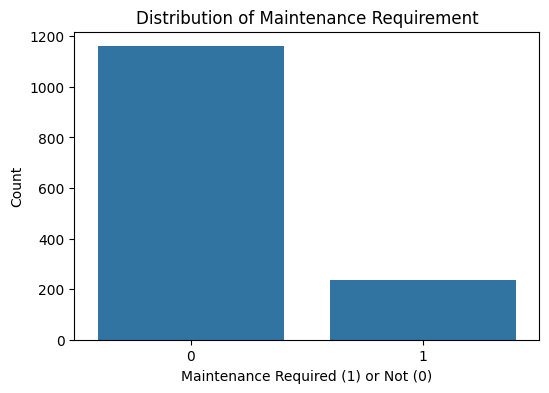

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='Target', data=data)
plt.title('Distribution of Maintenance Requirement')
plt.xlabel('Maintenance Required (1) or Not (0)')
plt.ylabel('Count')
plt.show()

In [8]:
corr_matrix = data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [9]:
X = data[features]
y = data[target]


In [10]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:

y_pred = rf.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report Randomforest:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : " , accuracy)


Confusion Matrix:
[[219   4]
 [  9  48]]

Classification Report Randomforest:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       223
           1       0.92      0.84      0.88        57

    accuracy                           0.95       280
   macro avg       0.94      0.91      0.93       280
weighted avg       0.95      0.95      0.95       280

Accuracy :  0.9535714285714286


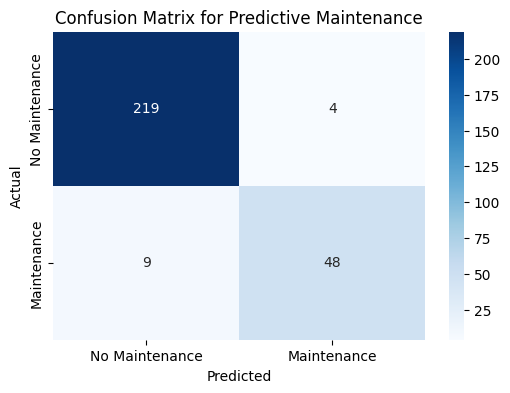

In [14]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Maintenance', 'Maintenance'], yticklabels=['No Maintenance', 'Maintenance'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Predictive Maintenance')
plt.show()


In [15]:
svm = SVC(kernel='linear', random_state=42)  

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report SVC:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

Confusion Matrix:
[[217   6]
 [ 23  34]]

Classification Report SVC:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       223
           1       0.85      0.60      0.70        57

    accuracy                           0.90       280
   macro avg       0.88      0.78      0.82       280
weighted avg       0.89      0.90      0.89       280

0.8964285714285715


In [16]:

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Train the model
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report DecisionTree :")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


Confusion Matrix:
[[215   8]
 [ 13  44]]

Classification Report DecisionTree :
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       223
           1       0.85      0.77      0.81        57

    accuracy                           0.93       280
   macro avg       0.89      0.87      0.88       280
weighted avg       0.92      0.93      0.92       280

0.925


In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report Logistic regression:")
print(classification_report(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Confusion Matrix:
[[217   6]
 [ 24  33]]

Classification Report Logistic regression:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       223
           1       0.85      0.58      0.69        57

    accuracy                           0.89       280
   macro avg       0.87      0.78      0.81       280
weighted avg       0.89      0.89      0.88       280

Accuracy: 0.8928571428571429
